In [1]:
import pandas as pd
import numpy as np
import plotly as plt
from src.data_loader import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold, StratifiedKFold
from sklearn.pipeline import make_pipeline


In [2]:
data = split_dataset()

In [3]:
data.keys()

dict_keys(['X_train', 'y_train', 'X_val', 'y_val', 'X_test', 'y_test'])

In [4]:
X_train = data['X_train']
y_train = data['y_train']
X_val = data['X_val']
y_val = data['y_val']
X_test = data['X_test']
y_test = data['y_test']

In [5]:
test_mse = []
r2_list = []

for i in range(1, 5):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly.fit_transform(X_train)
      
    mse_scores = cross_val_score(LinearRegression(), X_poly, y_train, scoring='neg_mean_squared_error')
    r2_scores = cross_val_score(LinearRegression(), X_poly, y_train, scoring='r2')
    
#     print(r2_scores)
    mse = -mse_scores.mean()
    test_mse.append(mse)
    r2_value = r2_scores.mean()
    r2_list.append(r2_value)

    print(f"The MSE of polynomial regression with degree {i} is: MSE: {mse:.4f}, R2: {r2_value:.4f}")
    

The MSE of polynomial regression with degree 1 is: MSE: 113156.5728, R2: -0.2537
The MSE of polynomial regression with degree 2 is: MSE: 153807.6761, R2: 0.1103
The MSE of polynomial regression with degree 3 is: MSE: 545595720.1862, R2: -2051.1725
The MSE of polynomial regression with degree 4 is: MSE: 667886.0413, R2: -2.1271


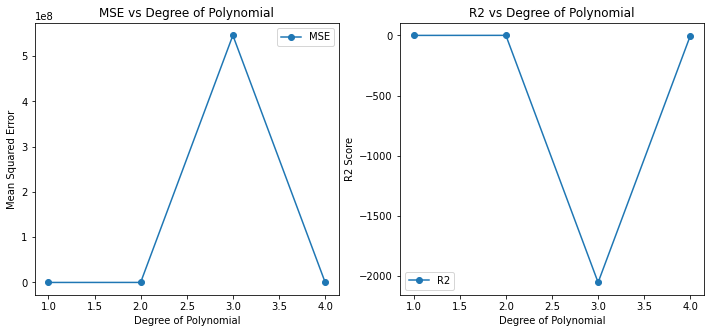

In [6]:
import matplotlib.pyplot as plt

# Assuming the degree range is from 1 to 5 (inclusive)
degrees = range(1, 5)

# Create a figure with two subplots: one for MSE and one for R2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the MSE curve
ax1.plot(degrees, test_mse, marker='o', linestyle='-', label="MSE")
ax1.set_xlabel("Degree of Polynomial")
ax1.set_ylabel("Mean Squared Error")
ax1.set_title("MSE vs Degree of Polynomial")
ax1.legend()

# Plot the R2 curve
ax2.plot(degrees, r2_list, marker='o', linestyle='-', label="R2")
ax2.set_xlabel("Degree of Polynomial")
ax2.set_ylabel("R2 Score")
ax2.set_title("R2 vs Degree of Polynomial")
ax2.legend()

# Show the plots
plt.show()
